#### Standard Imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd#### Standard Imports

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

#### Cell Width Increase

In [4]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:60% !important; }</style>"))

In [5]:
gapminder = pd.read_csv('gapminder.csv')

In [6]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


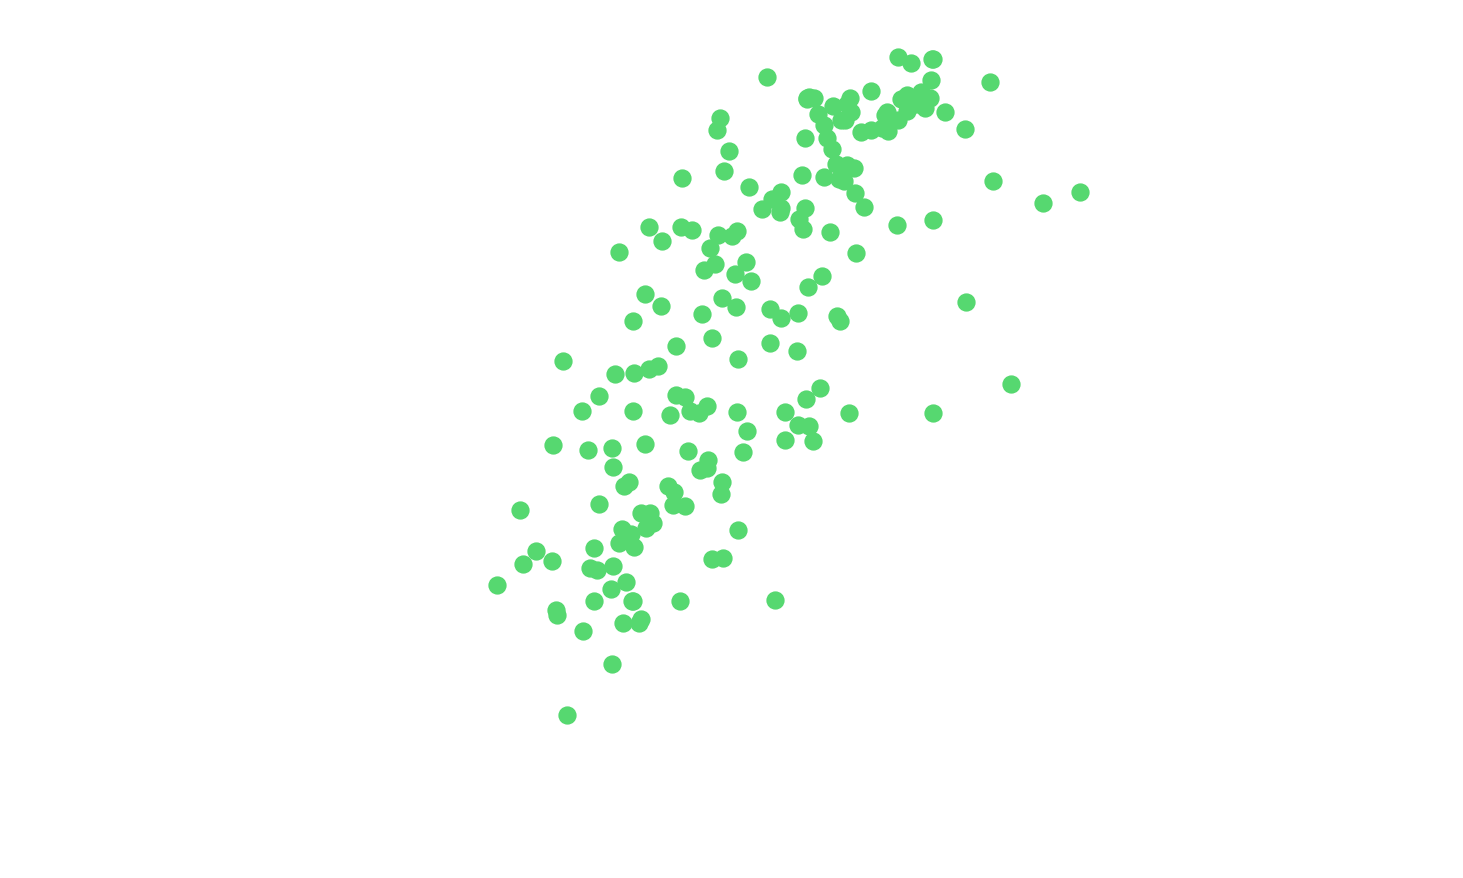

In [7]:
plotyear(1965)

In [18]:
# Change size of data points based on population quantity
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area)

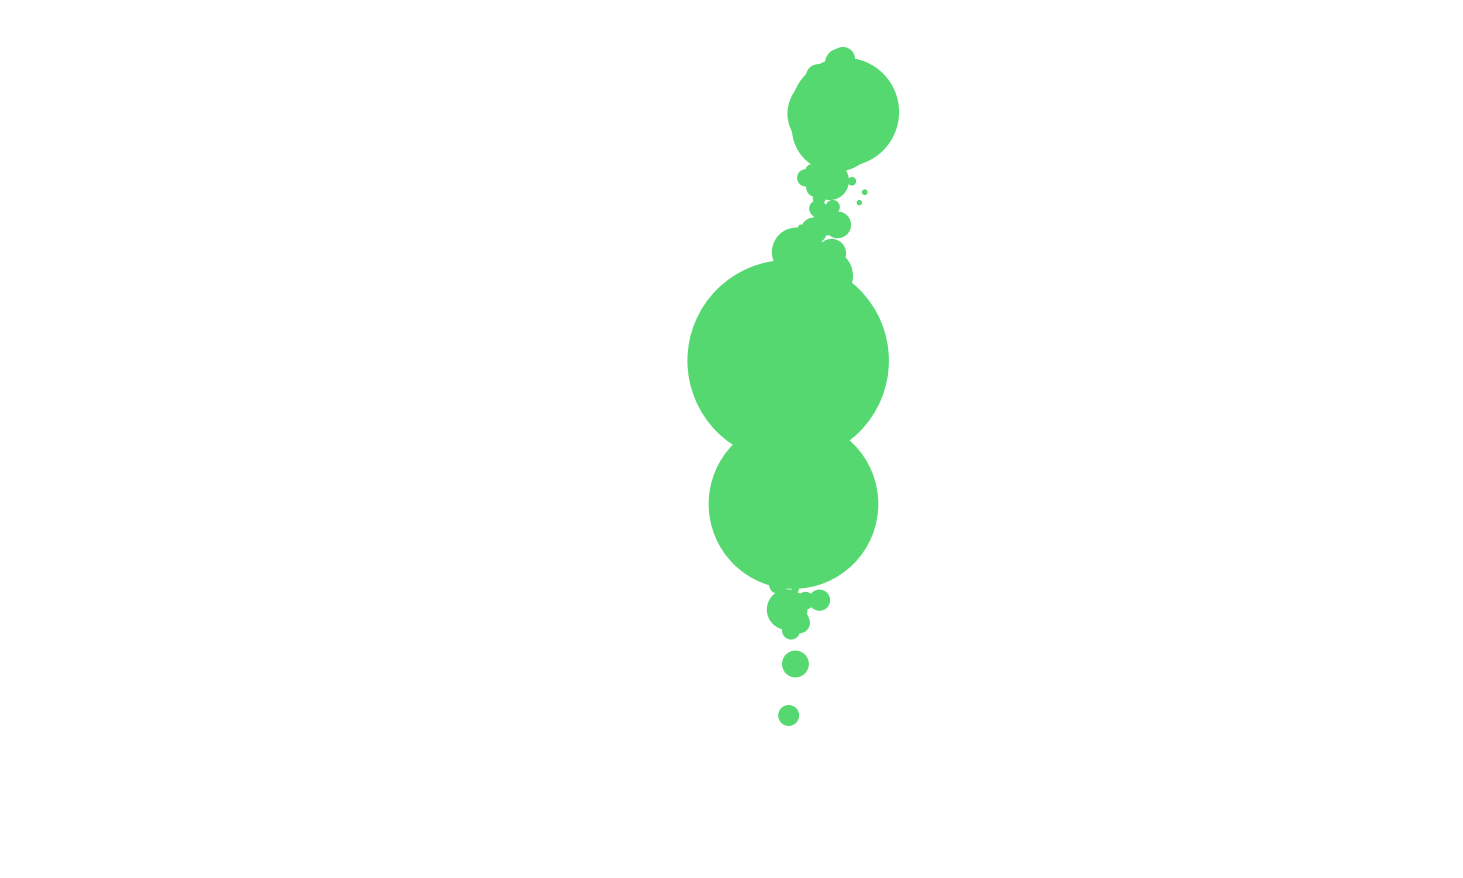

In [19]:
plotyear(1965);

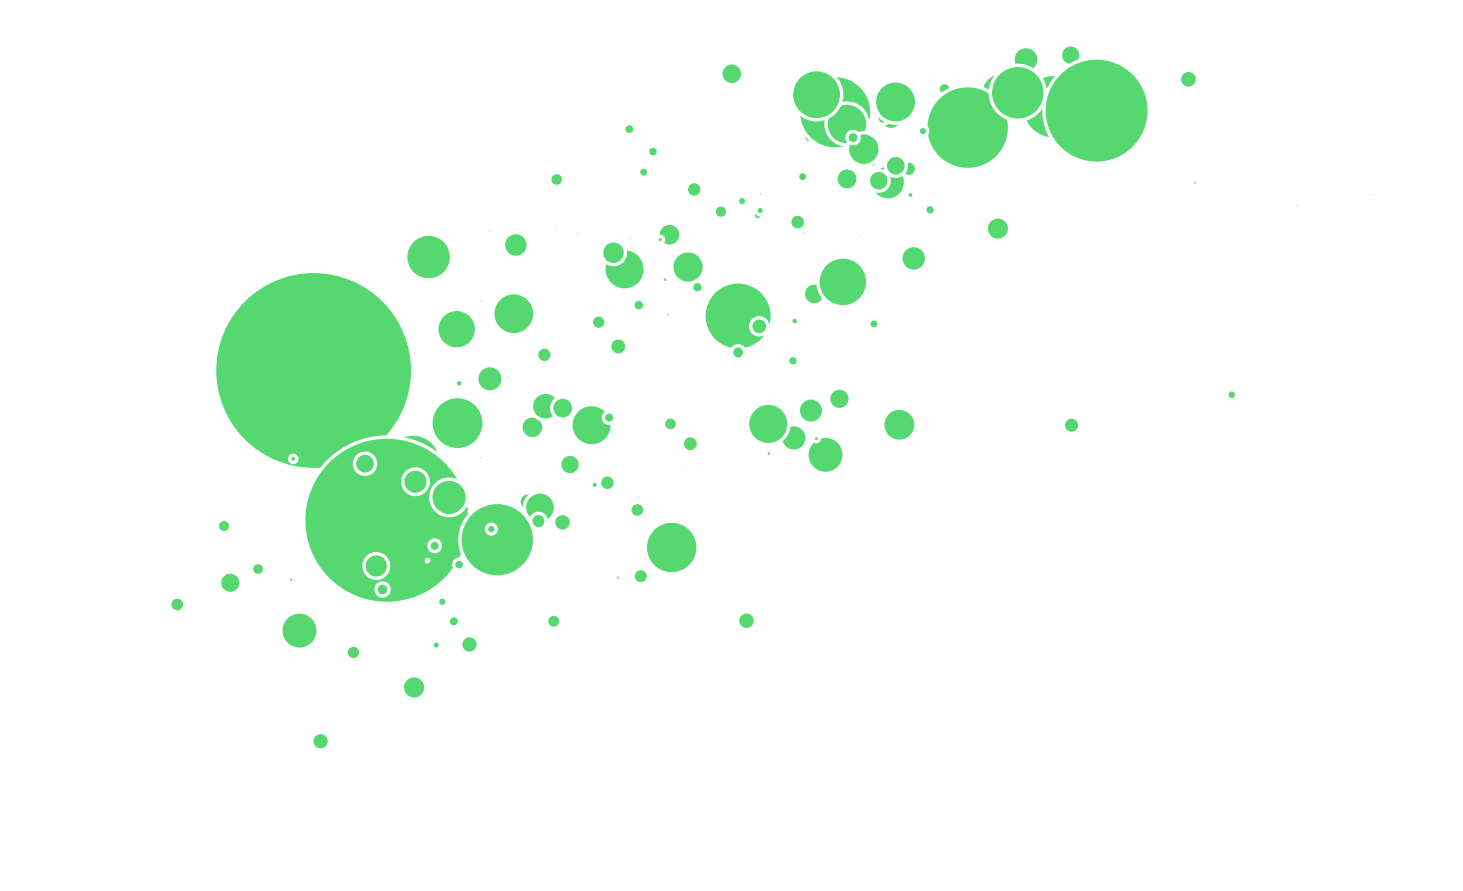

In [27]:
# Add definition to data points with linewidths and edgecolors
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area,
                     linewidths=1,
                     edgecolors='w')
""" Code for shrinking the x-axis """
    plt.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 75)
    
plotyear(1965)

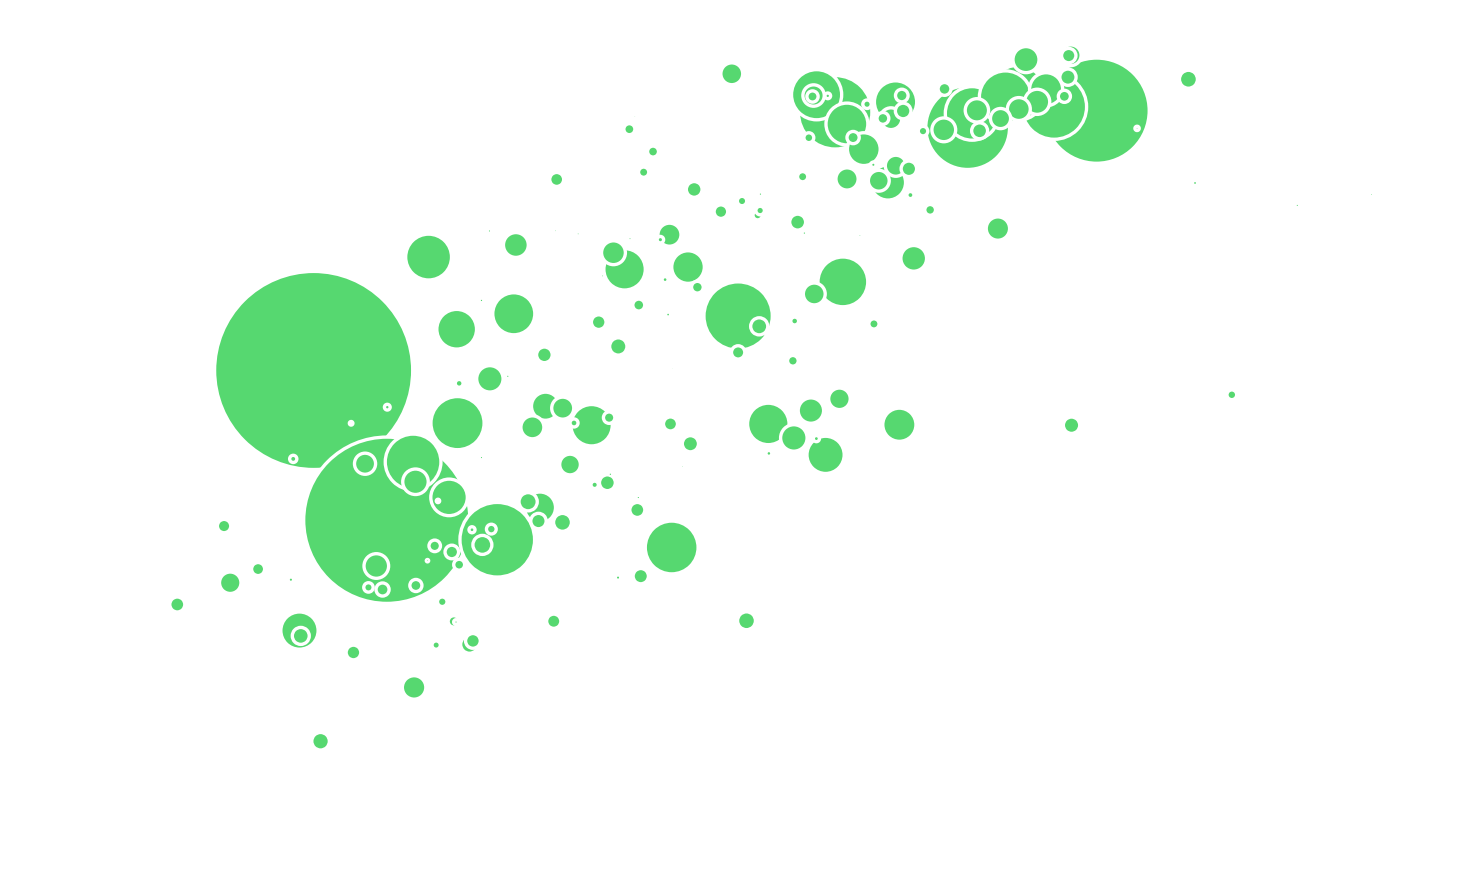

In [29]:
# Sort data points by population so larger data points sit in the back
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area,
                     linewidths=1,
                     edgecolors='w')
    # Code for shrinking the x-axis
    plt.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 75)
    
plotyear(1965)

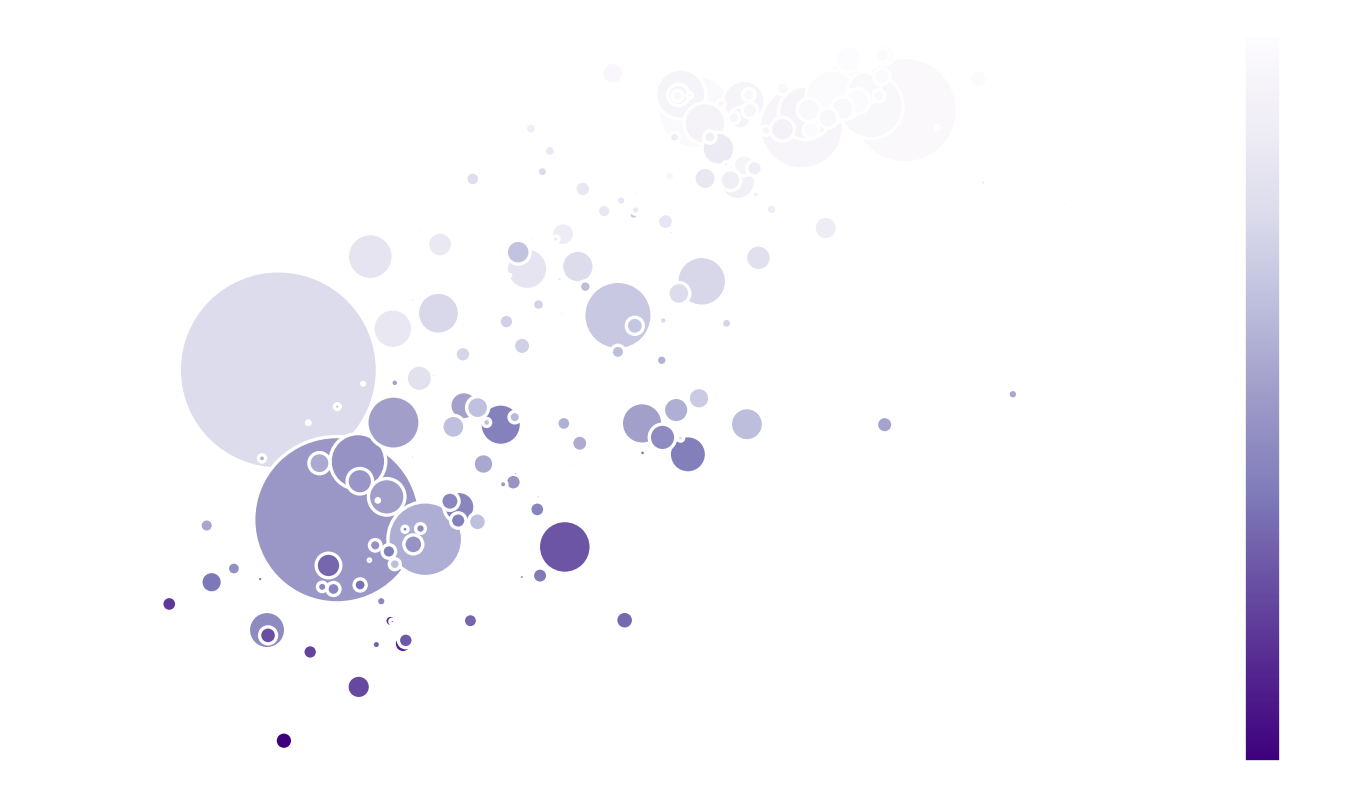

In [31]:
# Use color as an additional dimension
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area, c=color,
                     linewidths=1,
                     edgecolors='w',
    """ Use _r on Purples_r to inverse purple gradient """
                     colormap=matplotlib.cm.get_cmap('Purples_r'))
    # Code for shrinking the x-axis
    plt.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 75)
    
plotyear(1965)